In [17]:
import pandas as pd
from zipfile import ZipFile
import requests
from io import BytesIO


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"


response = requests.get(url)
with ZipFile(BytesIO(response.content), 'r') as zip_file:

    csv_file = zip_file.open('bank-additional/bank-additional-full.csv')
    bank_data = pd.read_csv(csv_file, sep=';')

# Display the first few rows and column names
print(bank_data.head())
print(bank_data.columns)



   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

In [19]:
# Encode categorical variables
le = LabelEncoder()
bank_data['y'] = le.fit_transform(bank_data['y'])  # Encode the target variable 'y' (yes/no)


In [20]:
X = bank_data.drop(columns=['y'])
y = bank_data['y']

In [21]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [23]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
y_pred = clf.predict(X_test)

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8868657441126487
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



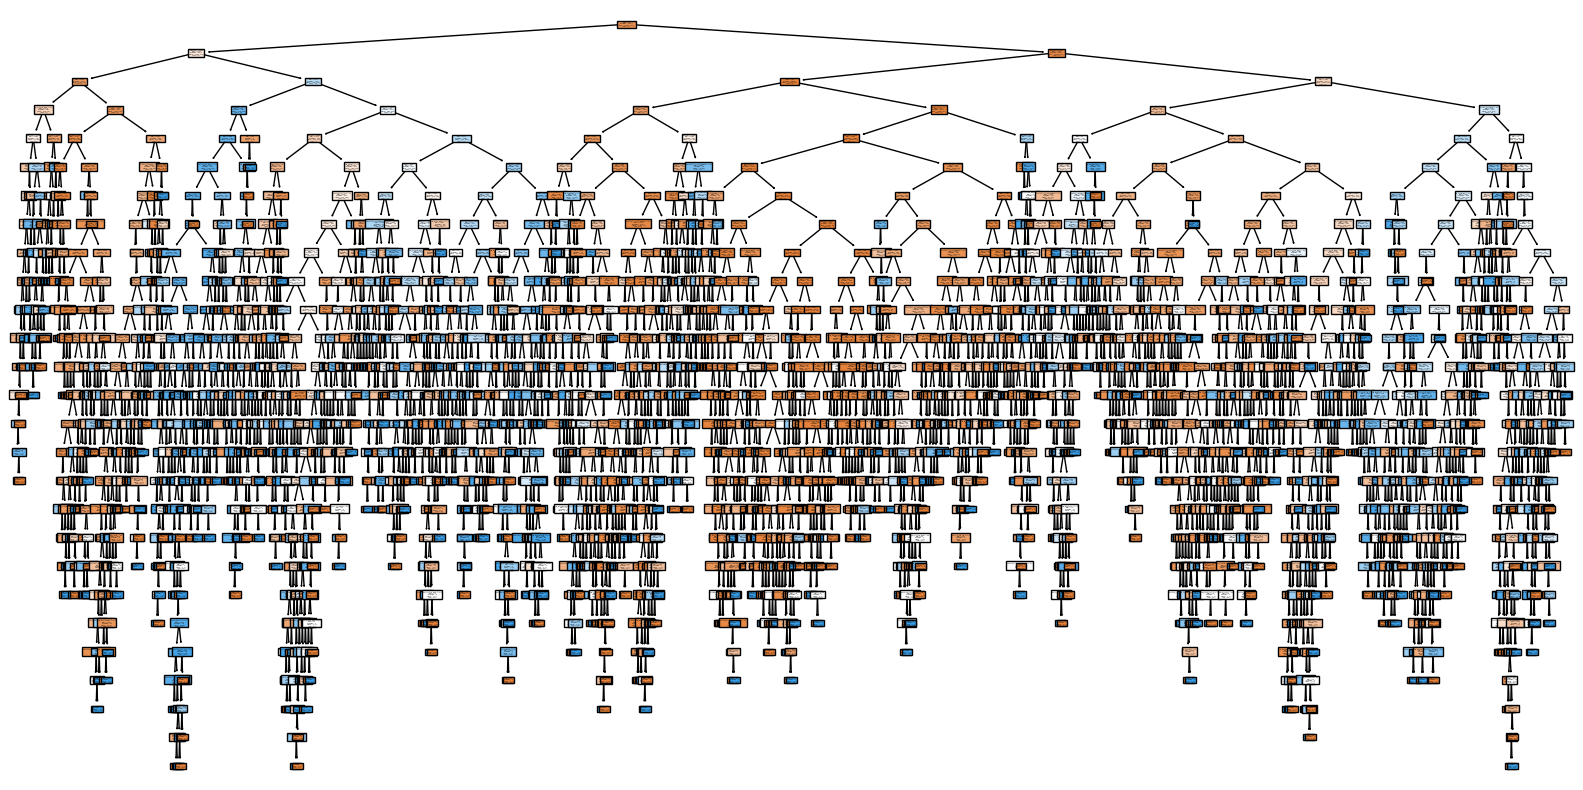

In [16]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X_encoded.columns, class_names=['No', 'Yes'])
plt.show()